## Q5. (Arithmetic Coding)

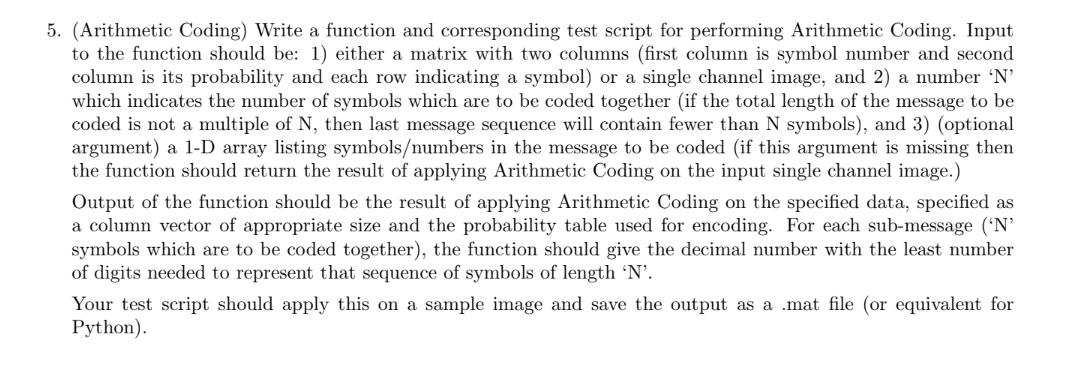

#### **Importing Libraries**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### **Defining Arithmetic Coding Function**

In [6]:
# Function to perform Arithmetic Coding
def ArithmeticCoding(N, single_channel_image=None, message = None, prob_matrix=None):
    
    if prob_matrix is None and single_channel_image is None:
        print("Please provide either probability matrix or single channel image")
        return
    
    if prob_matrix is None:
        
        # We have single channel image and using it to create probability matrix
        prob_matrix = np.zeros((256,2))

        # Creating probability matrix
        for i in range(256):
            prob_matrix[i][0] = i

        # Calculating probability of each symbol
        for i in range(single_channel_image.shape[0]):
            for j in range(single_channel_image.shape[1]):
                prob_matrix[int(single_channel_image[i][j])][1] += 1

        # Normalizing probability
        prob_matrix[:,1] = prob_matrix[:,1]/(single_channel_image.shape[0]*single_channel_image.shape[1])
        
        # Converting to list
        prob_matrix = prob_matrix.tolist()
    
    # Now we have probability matrix
    
    # Checking if message is provided
    if message is None:
        # Encode single channel image
        message = single_channel_image.flatten()
        # List
        message = message.tolist()
    
    # Now we have message
    # Let's start encoding in chunks of N
    encoded_message = []
    
    # Cumulative probability
    cum_prob_matrix = [[0 for i in range(2)] for j in range(len(prob_matrix))]

    for i in range(len(prob_matrix)):
        cum_prob_matrix[i][0] = prob_matrix[i][0]
        if i == 0:
            cum_prob_matrix[i][1] = prob_matrix[i][1]
        else:
            cum_prob_matrix[i][1] = cum_prob_matrix[i-1][1] + prob_matrix[i][1]
    
    
    for i in range(0, len(message), N):
        
        curr_block = None
        if i+N > len(message):
            curr_block = message[i:]
        else:
            curr_block = message[i:i+N]
            
        curr_min = 0
        curr_max = 1
            
        # print("Encoding Block:", curr_block)
        
        # Calculating range
        for j in range(len(curr_block)):
            
            # Finding cum_prob of symbol in probability matrix
            cum_prob = None
            for k in range(len(prob_matrix)):
                if prob_matrix[k][0] == curr_block[j]:
                    cum_prob = cum_prob_matrix[k][1]
                    break
            
            cum_prob_prev = 0
            if curr_block[j] != cum_prob_matrix[0][0]:
                for k in range(len(prob_matrix)):
                    if prob_matrix[k][0] == curr_block[j]:
                        cum_prob_prev = cum_prob_matrix[k][1] - prob_matrix[k][1]
                        break
            
            # print("Selected Character:", curr_block[j])
            # print("Current Range:", curr_min, curr_max)
            # print("Cumulative Probability:", cum_prob_prev, cum_prob)
            
            # Calculating range
            curr_min_new = curr_min + (curr_max - curr_min)*cum_prob_prev
            curr_max_new = curr_min + (curr_max - curr_min)*cum_prob
            
            curr_min = curr_min_new
            curr_max = curr_max_new
            
            # print("New Range:", curr_min, curr_max)
            
        # Append the Range
        encoded_message.append((curr_min, curr_max))
        
    return encoded_message, prob_matrix, N, len(message)

#### **Trying Examples**

**Trying an Example with Single Channel Image**

In [45]:
# Test the Function
encoded, prob_matrix, N, length = ArithmeticCoding(5, single_channel_image = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]))

In [46]:
encoded

[(0.004444122314453125, 0.004445075988769531),
 (0.33777713775634766, 0.33777809143066406),
 (0.6711101531982422, 0.6711111068725586),
 (0.9375, 1.0)]

In [47]:
np.array(prob_matrix).shape

(256, 2)

In [48]:
N, length

(5, 16)

**Trying an Example with Probability Matrix**

In [52]:
# Another Example
prob_matrix = [['A',0.2],['B',0.2],['C',0.4],['D',0.2]]
message = ['B','A','C','D']

encoded, prob_matrix, N, length = ArithmeticCoding(4, prob_matrix = prob_matrix, message = message)

In [53]:
encoded

[(0.2288, 0.232)]

In [54]:
prob_matrix

[['A', 0.2], ['B', 0.2], ['C', 0.4], ['D', 0.2]]

In [55]:
N, length

(4, 4)

**Trying with a Real Gray Scale Image**

-> We will try to encode Images produced in Question 3 and 4

In [64]:
# Read Q3.png and Q4.png
import cv2

# Read Q3.png as Grayscale
Q3 = cv2.imread("Q3.png", cv2.IMREAD_GRAYSCALE)

# Read Q4.png as Grayscale
Q4 = cv2.imread("Q4.png", cv2.IMREAD_GRAYSCALE)

In [65]:
Q3.shape, Q4.shape

((1044, 1044), (1064, 1064))

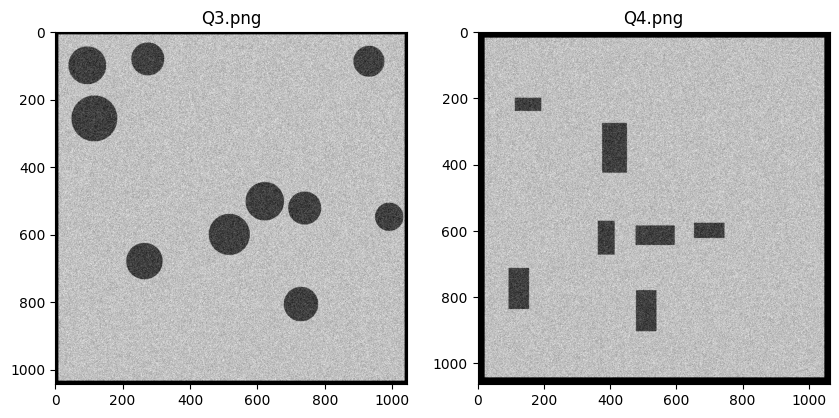

In [66]:
# Show Images In a Single Plot
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(Q3, cmap="gray")
ax[0].set_title("Q3.png")

ax[1].imshow(Q4, cmap="gray")
ax[1].set_title("Q4.png")

plt.show()

In [67]:
# Let's Encode Q3.png
encoded_Q3, prob_matrix_Q3, N_Q3, length_Q3 = ArithmeticCoding(4, single_channel_image = Q3)

# Let's Encode Q4.png
encoded_Q4, prob_matrix_Q4, N_Q4, length_Q4 = ArithmeticCoding(4, single_channel_image = Q4)

In [68]:
# Let's see the encoded messages
np.array(encoded_Q3).shape, np.array(encoded_Q4).shape

((272484, 2), (283024, 2))

In [69]:
# Probability Matrix for Q3.png and Q4.png
np.array(prob_matrix_Q3).shape, np.array(prob_matrix_Q4).shape

((256, 2), (256, 2))

In [70]:
N_Q3, length_Q3

(4, 1089936)

In [71]:
N_Q4, length_Q4

(4, 1132096)